In [1]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()
import FiniteDiff
import ForwardDiff as FD
import Convex as cvx 
import ECOS
using LinearAlgebra
using Plots
using Random
using JLD2
using Test
using MeshCat
const mc = MeshCat
using StaticArrays
using Printf

  Activating environment at `~/Masters/OCRL/project/ocrl_quadruped_mpc/Project.toml`


    Updating 

registry at `~/.julia/registries/General`


   Installed ProgressMeter ──────────── v1.10.0


   Installed StatsBase ──────────────── v0.34.3


   Installed DataStructures ─────────── v0.18.20
   Installed Plots ──────────────────── v1.40.4


   Installed OpenSSL ────────────────── v1.4.3
   Installed MutableArithmetics ─────── v1.4.3
   Installed DifferentiableCollisions ─ v0.1.5
   Installed Missings ───────────────── v1.2.0


   Installed ColorTypes ─────────────── v0.11.5
   Installed GeoInterface ───────────── v1.3.4
   Installed JuMP ───────────────────── v1.21.1
   Installed Latexify ───────────────── v0.16.3
   Installed Contour ────────────────── v0.6.3
   Installed MathOptInterface ───────── v1.29.0


   Installed Polyhedra ──────────────── v0.7.8


    Updating `~/Masters/OCRL/project/ocrl_quadruped_mpc/Project.toml`
  [5ae59095] 

+ Colors v0.12.10
  [f65535da] + Convex v0.15.4
  [64b45163] + DifferentiableCollisions v0.1.5
  [e2685f51] + ECOS v1.1.2
  [6a86dc24] + FiniteDiff v2.22.0
  [f6369f11] + ForwardDiff v0.10.36
  [b6b21f68] + Ipopt v1.6.2
  [033835bb] + JLD2 v0.4.46
  [b8f27783] + MathOptInterface v1.29.0
  [283c5d60] + MeshCat v0.16.1
  [91a5bcdd] + Plots v1.40.4
  [92933f4c] + ProgressMeter v1.10.0
  [90137ffa] + StaticArrays v1.9.3
    Updating `~/Masters/OCRL/project/ocrl_quadruped_mpc/Manifest.toml`
  [14f7f29c] + AMD v0.5.3
  [1520ce14] + AbstractTrees v0.4.5
  [79e6a3ab] + Adapt v3.7.2
  [4fba245c] + ArrayInterface v7.5.1
  [6e4b80f9] + BenchmarkTools v1.5.0
  [d1d4a3ce] + BitFlags v0.1.8
  [fa961155] + CEnum v0.5.0
  [7057c7e9] + Cassette v0.3.13
  [d360d2e6] + ChainRulesCore v1.23.0
  [9e997f8a] + ChangesOfVariables v0.1.8
  [523fee87] + CodecBzip2 v0.8.2
  [944b1d66] + CodecZlib v0.7.4
  [35d6a980] + ColorSchemes v3.24.0
  [3da002f7] + ColorTypes v0.11.5
  [c3611d14] + ColorVectorSpace v0.10.0


+ Setfield v1.1.1
  [992d4aef] + Showoff v1.0.3
  [777ac1f9] + SimpleBufferStream v1.1.0
  [a2af1166] + SortingAlgorithms v1.2.1
  [276daf66] + SpecialFunctions v2.3.1
  [90137ffa] + StaticArrays v1.9.3
  [1e83bf80] + StaticArraysCore v1.4.2
  [82ae8749] + StatsAPI v1.7.0
  [2913bbd2] + StatsBase v0.34.3
  [09ab397b] + StructArrays v0.6.18
  [3783bdb8] + TableTraits v1.0.1
  [bd369af6] + Tables v1.11.1
  [62fd8b95] + TensorCore v0.1.1
  [3bb67fe8] + TranscodingStreams v0.10.7
  [5c2747f8] + URIs v1.5.1
  [3a884ed6] + UnPack v1.0.2
  [1cfade01] + UnicodeFun v0.4.1
  [1986cc42] + Unitful v1.19.0
  [45397f5d] + UnitfulLatexify v1.6.3
  [41fe7b60] + Unzip v0.1.2
  [ae81ac8f] + ASL_jll v0.1.3+0
  [6e34b625] + Bzip2_jll v1.0.8+1
  [83423d85] + Cairo_jll v1.18.0+1
  [c2c64177] + ECOS_jll v200.0.800+0
  [5ae413db] + EarCut_jll v2.2.4+0
  [2702e6a9] + EpollShim_jll v0.0.20230411+0
  [2e619515] + Expat_jll v2.5.0+0
  [b22a6f82] + FFMPEG_jll v4.4.4+1
  [a3f928ae] + Fontconfig_jll v2.13.93+0
  [d7

  [975044d2] + Xorg_xcb_util_keysyms_jll v0.4.0+1
  [0d47668e] + Xorg_xcb_util_renderutil_jll v0.3.9+1
  [c22f9ab0] + Xorg_xcb_util_wm_jll v0.4.1+1
  [35661453] + Xorg_xkbcomp_jll v1.4.6+0
  [33bec58e] + Xorg_xkeyboard_config_jll v2.39.0+0
  [c5fb5394] + Xorg_xtrans_jll v1.5.0+0
  [3161d3a3] + Zstd_jll v1.5.6+0
  [35ca27e7] + eudev_jll v3.2.9+0
  [214eeab7] + fzf_jll v0.43.0+0
  [1a1c6b14] + gperf_jll v3.1.1+0
  [a4ae2306] + libaom_jll v3.4.0+0
  [0ac62f75] + libass_jll v0.15.1+0
  [8e850b90] + libblastrampoline_jll v3.1.0+2
  [2db6ffa8] + libevdev_jll v1.11.0+0
  [f638f0a6] + libfdk_aac_jll v2.0.2+0
  [36db933b] + libinput_jll v1.18.0+0
  [b53b4c65] + libpng_jll v1.6.43+1
  [f27f6e37] + libvorbis_jll v1.3.7+1
  [009596ad] + mtdev_jll v1.1.6+0
  [1270edf5] + x264_jll v2021.5.5+0
  [dfaa095f] + x265_jll v3.5.0+0
  [d8fb68d0] + xkbcommon_jll v1.4.1+1
  [0dad84c5] + ArgTools
  [56f22d72] + Artifacts
  [2a0f44e3] + Base64
  [ade2ca70] + Dates
  [8bb1440f] + DelimitedFiles
  [8ba89e20] + Di

[ Info: Listening on: 127.0.0.1:8700, thread id: 1
┌ Info: MeshCat server started. You can open the visualizer by visiting the following URL in your browser:
└ http://127.0.0.1:8700


[ Info: Server on 127.0.0.1:8700 closing
[ Info: MeshCat server closed.


## Dynamics

In [2]:
function skew_symmetric(r::Vector) #function to convert vector to cross-product skew-symmetric matrix
    R = [0 -r[3] r[2]; r[3] 0 -r[1]; -r[2] r[1] 0]
    return R
end

function R_z(sigma::Real)
     R = [cos(sigma) sin(sigma) 0; -sin(sigma) cos(sigma) 0; 0 0 1]
    return R
end

#dynamics function of quadruped
function dynamics(model::NamedTuple, x::Vector, u::Vector, r1::Vector, r2::Vector, r3::Vector, r4::Vector)
    #state is defined as [x,theta,x_dot,theta_dot]^T
    #force is defined as [fl,fr,bl,br]^T where each one is composed of x,y,z forces
    
    m, J = model.m, model.J

    A = vcat(hcat(zeros(6,6), vcat(hcat(R_z(x[6]),zeros(3,3)),hcat(zeros(3,3),Matrix{Float64}(I,3,3)))), zeros(6,12)) #A matrix
    #B1 is first 9 rows of B matrix, first 6 rows are zeros, next rows are F = ma
    B1 = vcat(zeros(6,12), 1/m * hcat(hcat(Matrix{Float64}(I,3,3),Matrix{Float64}(I,3,3)),hcat(Matrix{Float64}(I,3,3),Matrix{Float64}(I,3,3))))
    #B2 is last 3 rows of B matrix effecting theta_dot, these are tau = J*theta_dot
    B2 = hcat(hcat(J \ skew_symmetric(r1 - x[1:3]), J \ skew_symmetric(r2 - x[1:3])),hcat(J \ skew_symmetric(r3 - x[1:3]), J \ skew_symmetric(r4 - x[1:3])))
    B = vcat(B1,B2) #add B1 to B2 to get full B matrix
    C = vcat(vcat(zeros(8),1),zeros(3)) #gravity term    
    
    Ag = vcat(hcat(A,C),zeros(1,13))
    Bg = vcat(B,zeros(1,12))
    
    x_dot = Ag * x + Bg * u #calculate x_dot (full state derivative)
    
#     @show Ag
#     @show Ag * x
#     @show Bg
#     @show Bg * u
    
    return x_dot
end

#rk4 function for discritization of dynamics
function rk4(model::NamedTuple, ode::Function, x::Vector, u::Vector, r1::Vector, r2::Vector, r3::Vector, r4::Vector, dt::Real)::Vector
    k1 = dt * ode(model, x,        u, r1, r2, r3, r4)
    k2 = dt * ode(model, x + k1/2, u, r1, r2, r3, r4)
    k3 = dt * ode(model, x + k2/2, u, r1, r2, r3, r4)
    k4 = dt * ode(model, x + k3,   u, r1, r2, r3, r4)
    return x + (1/6)*(k1 + 2*k2 + 2*k3 + k4)
end


rk4 (generic function with 1 method)

## Reference Trajectory and Gait Planner

In [3]:
function reference_trajectory(model, xic, xg, dt, gait_period, num_gaits)
    # creates a reference Xref and Uref for walker
    
    l, w, m, g = model.l, model.w, model.m, model.g
    
    N = Int(num_gaits * gait_period / dt + 2) #define N
    
    half_gait = Int(gait_period / (2 * dt))     #number of time steps in half a gait period
    quarter_gait = Int(gait_period / (4 * dt))  #number of time steps in a quarter of a gait period
    
    fl_s = zeros(N) #initialize fl_s etc. These are the gait timings
    fl_s[1] = 1
    fl_s[N] = 1
    fr_s = zeros(N)
    fr_s[1] = 1
    fr_s[N] = 1
    bl_s = zeros(N)
    bl_s[1] = 1    
    bl_s[N] = 1
    br_s = zeros(N)
    br_s[1] = 1
    br_s[N] = 1
    
    #diagonal trot gait
#     state = 0
#     for i = 2:half_gait:N-1  #every quarter gait, switch feet
#         if(state == 0)
#             fl_s[i:i+half_gait-1] = zeros(half_gait)
#             fr_s[i:i+half_gait-1] = ones(half_gait)
#             bl_s[i:i+half_gait-1] = ones(half_gait)
#             br_s[i:i+half_gait-1] = zeros(half_gait)
#             state = 1
#         elseif(state == 1)
#             fl_s[i:i+half_gait-1] = ones(half_gait)
#             fr_s[i:i+half_gait-1] = zeros(half_gait)
#             bl_s[i:i+half_gait-1] = zeros(half_gait)
#             br_s[i:i+half_gait-1] = ones(half_gait)
#             state = 0
#         end
#     end
    
    #bear walk gait
    state = 0
    for i = 2:quarter_gait:N-1  #every quarter gait, switch feet
        if(state == 0)
            fl_s[i:i+quarter_gait-1] = zeros(quarter_gait)
            fr_s[i:i+quarter_gait-1] = ones(quarter_gait)
            bl_s[i:i+quarter_gait-1] = ones(quarter_gait)
            br_s[i:i+quarter_gait-1] = ones(quarter_gait)
            state = 1
        elseif(state == 1)
            fl_s[i:i+quarter_gait-1] = ones(quarter_gait)
            fr_s[i:i+quarter_gait-1] = ones(quarter_gait)
            bl_s[i:i+quarter_gait-1] = ones(quarter_gait)
            br_s[i:i+quarter_gait-1] = zeros(quarter_gait)
            state = 2
        elseif(state == 2)
            fl_s[i:i+quarter_gait-1] = ones(quarter_gait)
            fr_s[i:i+quarter_gait-1] = zeros(quarter_gait)
            bl_s[i:i+quarter_gait-1] = ones(quarter_gait)
            br_s[i:i+quarter_gait-1] = ones(quarter_gait)
            state = 3
        elseif(state == 3)
            fl_s[i:i+quarter_gait-1] = ones(quarter_gait)
            fr_s[i:i+quarter_gait-1] = ones(quarter_gait)
            bl_s[i:i+quarter_gait-1] = zeros(quarter_gait)
            br_s[i:i+quarter_gait-1] = ones(quarter_gait)
            state = 0
        end
    end
    
#     @show fl_s
#     @show fr_s
#     @show bl_s
#     @show br_s
    
    Xref = [zeros(13) for i = 1:N] #initialize state reference trajectory
    
    v = (xg[3] - xic[3]) / ((N-1) * dt) #assuming straight line path, get constant velocity required
    
    for i = 1:N #fill in state reference trajectory
        Xref[i] = vcat(((N-i) * xic[1:6] + (i-1) * xg[1:6]) / (N-1), [v,0,0,0,0,0,g])
    end
    
#     Uref = [zeros(12) for i = 1:N-1] #initialize state reference trajectory
    
#     for i = 1:N-1
#         count = fl_s[i] + fr_s[i] + bl_s[i] + br_s[i]
#         Uref[i][3] = fl_s[i] * -m*g / count
#         Uref[i][6] = fr_s[i] * -m*g / count
#         Uref[i][9] = bl_s[i] * -m*g / count
#         Uref[i][12] = br_s[i] * -m*g / count
#     end
    
    r1 = [zeros(3) for i=1:N] #initialize r vectors
    r2 = [zeros(3) for i=1:N]
    r3 = [zeros(3) for i=1:N]
    r4 = [zeros(3) for i=1:N]
    
    r1[1] = [l/2 + Xref[1][1], w/2 + Xref[1][2], 0] #start standing up straight
    r2[1] = [l/2 + Xref[1][1], -w/2 + Xref[1][2], 0]
    r3[1] = [-l/2 + Xref[1][1], w/2 + Xref[1][2], 0]
    r4[1] = [-l/2 + Xref[1][1], -w/2 + Xref[1][2], 0]
    
    r1[N] = [l/2 + Xref[N][1], w/2 + Xref[N][2], 0] #end standing up straight
    r2[N] = [l/2 + Xref[N][1], -w/2 + Xref[N][2], 0]
    r3[N] = [-l/2 + Xref[N][1], w/2 + Xref[N][2], 0]
    r4[N] = [-l/2 + Xref[N][1], -w/2 + Xref[N][2], 0]
    
    for i = 2:N-1 #for each sequential half gait, set legs reaching past shoulders to start
        r1[i] = r1[i-1]
        r2[i] = r2[i-1]
        r3[i] = r3[i-1]
        r4[i] = r4[i-1]
        if((fl_s[i-1] == 0) & (fl_s[i] == 1))
            r1[i] = [l/2 + Xref[i][1] + gait_period/2 * v, w/2 + Xref[i][2], 0]
        end
        if((fr_s[i-1] == 0) & (fr_s[i] == 1))
            r2[i] = [l/2 + Xref[i][1] + gait_period/2 * v, -w/2 + Xref[i][2], 0]
        end
        if((bl_s[i-1] == 0) & (bl_s[i] == 1))
            r3[i] = [-l/2 + Xref[i][1] + gait_period/2 * v, w/2 + Xref[i][2], 0]
        end
        if((br_s[i-1] == 0) & (br_s[i] == 1))
            r4[i] = [-l/2 + Xref[i][1] + gait_period/2 * v, -w/2 + Xref[i][2], 0]
        end
    end
        
    return Xref, N, fl_s, fr_s, bl_s, br_s, r1, r2, r3, r4
end

reference_trajectory (generic function with 1 method)

## Test Dynamics and Gait Planner

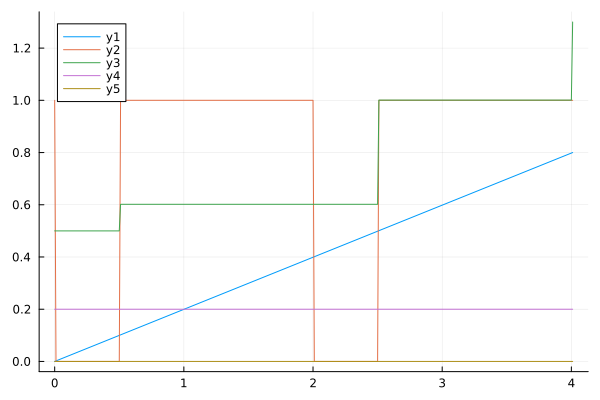

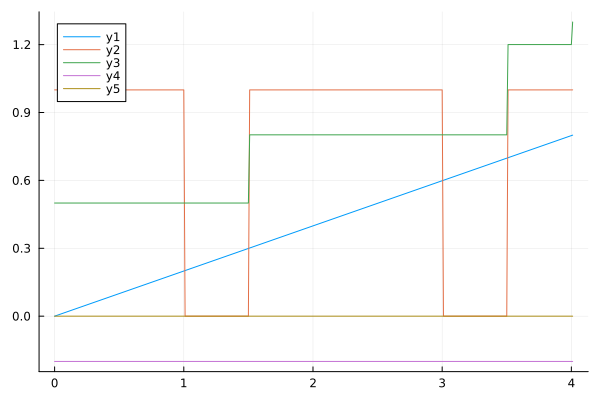

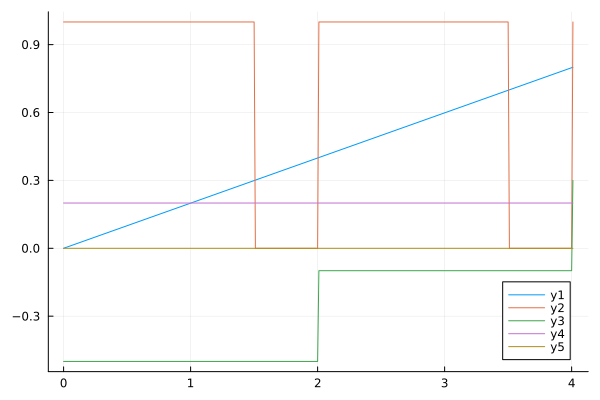

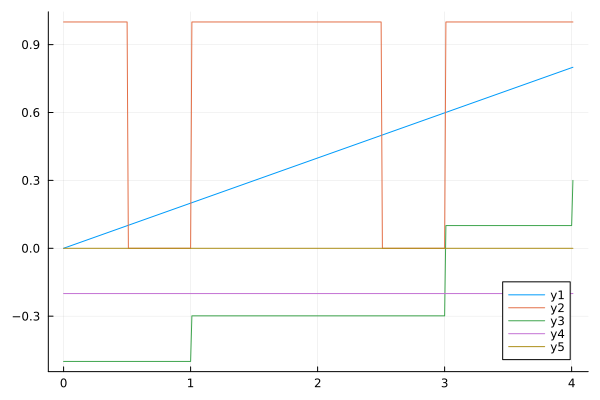

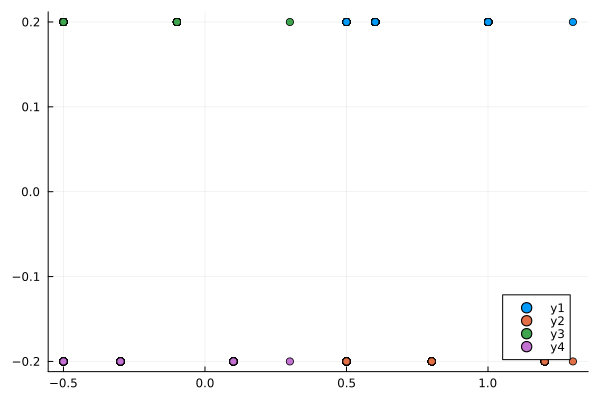

xg = [0.8, 0.0, 0.6, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Xref[1] = [0.0, 0.0, 0.6, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -9.81]
Uref[1] = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
fl_s[1] = 1.0
fr_s[1] = 1.0
bl_s[1] = 1.0
br_s[1] = 1.0
r1[1] = [0.5, 0.2, 0.0]
r2[1] = [0.5, -0.2, 0.0]
r3[1] = [-0.5, 0.2, 0.0]
r4[1] = [-0.5, -0.2, 0.0]
x_dot = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -9.81, 0.0, 0.0, 0.0, 0.0]


In [7]:
#model defined here
model = (g = -9.81, m = 5.0, J = diagm([1,5.2,5.8]), l = 1.0, w = 0.4, h = 0.6, mu = 0.5)
v = 0.2
dt = 0.01
gait_period = 2
num_gaits = 2
xic = [0,0,model.h,0,0,0,0,0,0,0,0,0]
xg = [v*gait_period*num_gaits,0,model.h,0,0,0,0,0,0,0,0,0]
@show xg



#construct reference trajectory
Xref, N, fl_s, fr_s, bl_s, br_s, r1, r2, r3, r4 = reference_trajectory(model, xic, xg, dt, gait_period, num_gaits)
tf = N * dt 
t_vec = 0:dt:tf
# Uref = [zeros(12) for i=1:N-1]

@show Xref[1]
@show Uref[1]
@show fl_s[1]
@show fr_s[1]
@show bl_s[1]
@show br_s[1]
@show r1[1]
@show r2[1]
@show r3[1]
@show r4[1]

x_dot = dynamics(model, Xref[1], Uref[1], r1[1], r2[1], r3[1], r4[1])

@show x_dot

# # calculate Jacobians
# As = [zeros(nx,nx) for i = 1:N-1]
# Bs = [zeros(nx,nu) for i = 1:N-1]
# for i = 1:N-1
#     As[i] = FD.jacobian(x -> rk4(model, dynamics, x, Uref[i], r1[i], r2[i], r3[i], r4[i], dt), Xref[i])
#     Bs[i] = FD.jacobian(u -> rk4(model, dynamics, Xref[i], u, r1[i], r2[i], r3[i], r4[i], dt), Uref[i])
# end
# #this C is our gravity term (not sure if this is done correctly)
# C = rk4(model, dynamics, zeros(12), zeros(12), r1[1], r2[1], r3[1], r4[1], dt)

# Xsim = [zeros(12) for i = 1:N]
# Xsim[1] = Xref[1]

# for i = 1:N-1
#     Xsim[i+1] = rk4(model, dynamics, Xsim[i], U[i], r1[i], r2[i], r3[i], r4[i], dt)
# end

# Xsim = hcat(Xsim...)

# display(plot(t_vec[1:end-1], Xsim[1:3,:]', lc = [:red :green :blue]))

# display(plot(t_vec[1:end-1], Xsim[4:6,:]', lc = [:red :green :blue]))
# plot(t_vec[1:end-1], fl_s)
# plot!(t_vec[1:end-1], fr_s)
# plot!(t_vec[1:end-1], bl_s)
# display(plot!(t_vec[1:end-1], br_s))
    
r1 = hcat(r1...)
r2 = hcat(r2...)
r3 = hcat(r3...)
r4 = hcat(r4...)
Xref = hcat(Xref...)

plot(t_vec[1:end-1], Xref[1,:])
plot!(t_vec[1:end-1], fl_s)
display(plot!(t_vec[1:end-1], r1[1:3,:]'))

plot(t_vec[1:end-1], Xref[1,:])
plot!(t_vec[1:end-1], fr_s)
display(plot!(t_vec[1:end-1], r2[1:3,:]'))
    
plot(t_vec[1:end-1], Xref[1,:])
plot!(t_vec[1:end-1], bl_s)
display(plot!(t_vec[1:end-1], r3[1:3,:]'))

plot(t_vec[1:end-1], Xref[1,:])
plot!(t_vec[1:end-1], br_s)
display(plot!(t_vec[1:end-1], r4[1:3,:]'))

scatter(r1[1,:], r1[2,:], mode="markers")
scatter!(r2[1,:], r2[2,:], mode="markers")
scatter!(r3[1,:], r3[2,:], mode="markers")
display(scatter!(r4[1,:], r4[2,:], mode="markers"))
    
# plot(t_vec[1:end-2], Urefm[1:3,:]', ls = :dash, lc = [:red :green :blue],
# xlabel = "time (s)", ylabel = "controls", title = "Controls FL")
# display(plot!(t_vec[1:end-2], Um[1:3,:]', lc = [:red :green :blue]))
#     plot(t_vec[1:end-2], Urefm[4:6,:]', ls = :dash, lc = [:red :green :blue],
# xlabel = "time (s)", ylabel = "controls", title = "Controls FR")
# display(plot!(t_vec[1:end-2], Um[4:6,:]', lc = [:red :green :blue]))
# plot(t_vec[1:end-2], Urefm[7:9,:]', ls = :dash, lc = [:red :green :blue],
# xlabel = "time (s)", ylabel = "controls", title = "Controls BL")
# display(plot!(t_vec[1:end-2], Um[7:9,:]', lc = [:red :green :blue]))
# plot(t_vec[1:end-2], Urefm[10:12,:]', ls = :dash, lc = [:red :green :blue],
# xlabel = "time (s)", ylabel = "controls", title = "Controls BR")
# display(plot!(t_vec[1:end-2], Um[10:12,:]', lc = [:red :green :blue]))

## Solve

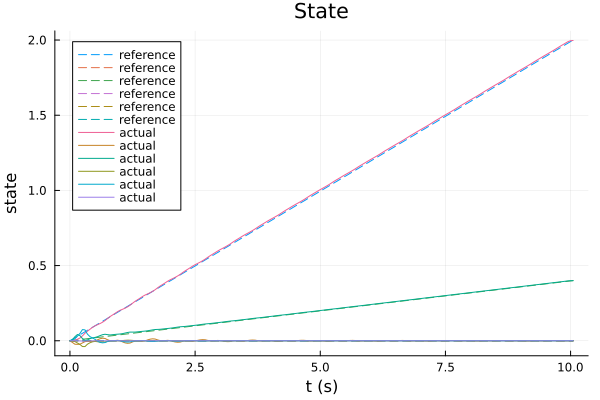

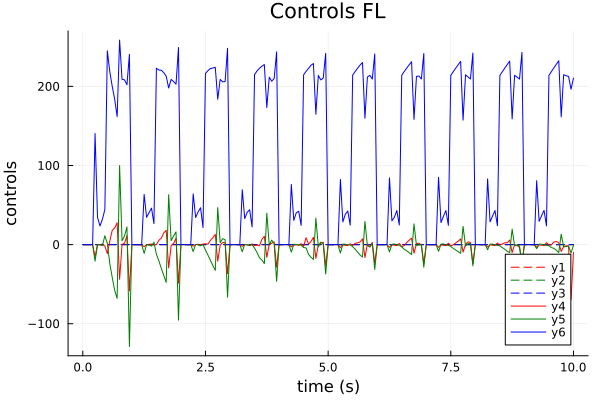

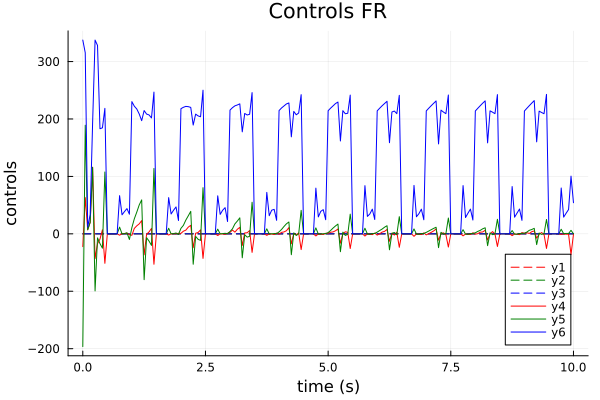

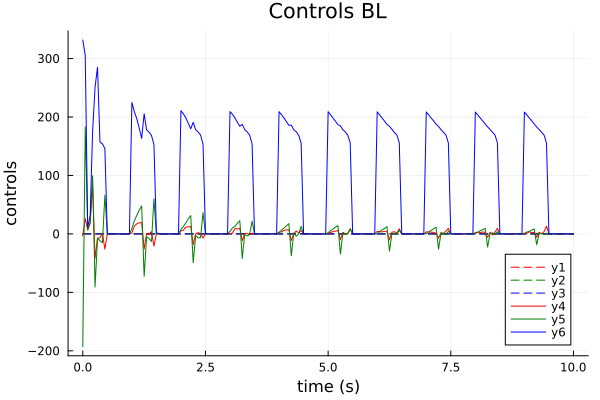

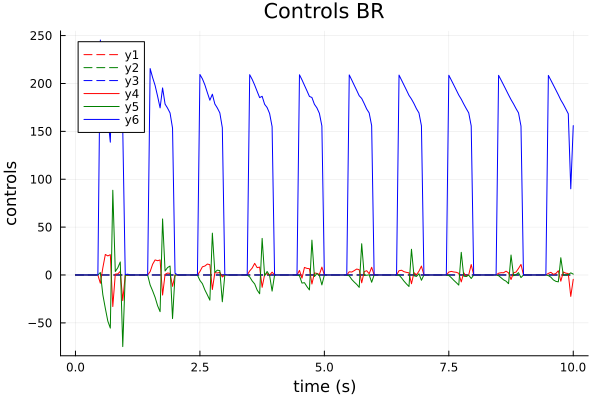

In [38]:
function vec_from_mat(Xm::Matrix)::Vector{Vector{Float64}}
    # convert a matrix into a vector of vectors 
    X = [Xm[:,i] for i = 1:size(Xm,2)]
    return X 
end

#model defined here
model = (g = -9.81, m = 43.0, J = diagm([0.41,2.1,2.1]), l = 0.8, w = 0.3, h = 0.4, mu = 0.6)
v = 0.2
dt = 0.05
gait_period = 1
num_gaits = 10
xic = [0,0,model.h,0,0,0,0,0,0,0,0,0]
# xic = [0,0,0.0,0,0,0,0,0,0,0,0,0]
xg = [v*gait_period*num_gaits,0,model.h,0,0,0,0,0,0,0,0,0]

#construct reference trajectory
Xref, N, fl_s, fr_s, bl_s, br_s, r1, r2, r3, r4 = reference_trajectory(model, xic, xg, dt, gait_period, num_gaits)

Uref = [zeros(12) for i=1:N-1]

# @show r1
# @show r2
# @show r3
# @show r4
# @show N

tf = N * dt 
t_vec = 0:dt:tf 

nx = 12
nu = 12

# LQR tracking cost to be used in ILC 
Q = diagm([100,100,100,100,100,100,1,1,1,1,1,1,0])
R = 0*diagm(ones(nu))
Qf = 10*Q
            
# calculate Jacobians
As = [zeros(nx,nx) for i = 1:N-1]
Bs = [zeros(nx,nu) for i = 1:N-1]
for i = 1:N-1
    As[i] = FD.jacobian(x -> rk4(model, dynamics, x, Uref[i], r1[i], r2[i], r3[i], r4[i], dt), Xref[i])
    Bs[i] = FD.jacobian(u -> rk4(model, dynamics, Xref[i], u, r1[i], r2[i], r3[i], r4[i], dt), Uref[i])
end

# @show As[6]
# @show As[7]
# @show Bs[6]
# @show Bs[7]

real_model = (g = -9.81, m = 50.0, J = diagm([0.5,2.5,2.5]), l = 0.8, w = 0.3, h = 0.4, mu = 0.6)
Xsim = [zeros(13) for i=1:N]
Usim = [zeros(12) for i=1:N-1]
Xsim[1] = Xref[1]

horizon = 20
for j = 1:N-1

    # create variables 
    X = cvx.Variable(nx+1, horizon) #add extra state dimension for gravity
    U = cvx.Variable(nu, horizon-1)

    # cost function (tracking cost on Xref, Uref)
    cost = 0.0
    for k = 1:horizon
        # add stagewise cost 
        if (k+j < N) & (k < horizon)
            cost += 0.5*cvx.quadform(X[:,k] - Xref[k+j],Q) + 0.5*cvx.quadform(U[:,k],R)
        else
            cost += 0.5*cvx.quadform(X[:,k] - Xref[N],Qf)
        end
    end

    # problem instance
    prob = cvx.minimize(cost)

    # initial condition constraint
    prob.constraints += (X[:,1] == Xsim[j])

    # final condition constraint
#     if j+horizon < N
#         prob.constraints += (X[:,horizon] == Xref[j+horizon])
#     else
#         prob.constraints += (X[:,horizon] == Xref[N])        
#     end

    # dynamics constraints
    for k = 1:horizon-1
        if j+k < N-1
            A = As[j+k]
            B = Bs[j+k]
        else
            A = As[N-1]
            B = Bs[N-1]
        end
        prob.constraints += (X[:,k+1] == A*X[:,k] +B*U[:,k])
    end

    #height constraint (no limbo)
#     for k = 1:horizon
#         prob.constraints += (X[3,k] > model.h * 0.8)x[3]
#         prob.constraints += (X[3,k] < model.h * 1.2)
#     end

    # gait constraints (only able to use feet when the are on the ground)
    for k = 1:horizon-1
        if k+j < N
            if fl_s[k+j] == 0
                prob.constraints += (U[3,k] == 0)
            else
                prob.constraints += (U[3,k] > 0)  
                prob.constraints += (U[3,k] <= -model.m*model.g*0.8)        
            end
            if fr_s[k+j] == 0
                prob.constraints += (U[6,k] == 0)
            else
                prob.constraints += (U[6,k] > 0)
                prob.constraints += (U[6,k] <= -model.m*model.g*0.8)   
            end
            if bl_s[k+j] == 0
                prob.constraints += (U[9,k] == 0)
            else
                prob.constraints += (U[9,k] > 0) 
                prob.constraints += (U[9,k] <= -model.m*model.g*0.8)  
            end
            if br_s[k+j] == 0
                prob.constraints += (U[12,k] == 0)
            else
                prob.constraints += (U[12,k] > 0) 
                prob.constraints += (U[12,k] <= -model.m*model.g*0.8)  
            end
        else
            if fl_s[N-1] == 0
                prob.constraints += (U[3,k] == 0)
            else
                prob.constraints += (U[3,k] > 0)  
                prob.constraints += (U[3,k] <= -model.m*model.g*0.8)        
            end
            if fr_s[N-1] == 0
                prob.constraints += (U[6,k] == 0)
            else
                prob.constraints += (U[6,k] > 0)
                prob.constraints += (U[6,k] <= -model.m*model.g*0.8)   
            end
            if bl_s[N-1] == 0
                prob.constraints += (U[9,k] == 0)
            else
                prob.constraints += (U[9,k] > 0) 
                prob.constraints += (U[9,k] <= -model.m*model.g*0.8)  
            end
            if br_s[N-1] == 0
                prob.constraints += (U[12,k] == 0)
            else
                prob.constraints += (U[12,k] > 0) 
                prob.constraints += (U[12,k] <= -model.m*model.g*0.8)  
            end
        end
    end

    #friction constraints (friction cone)
    for k = 1:horizon-1
        #front left
        prob.constraints += (U[1,k] <= model.mu * U[3,k])
        prob.constraints += (U[1,k] >= -model.mu * U[3,k])
        prob.constraints += (U[2,k] <= model.mu * U[3,k])
        prob.constraints += (U[2,k] >= -model.mu * U[3,k])
        #front right
        prob.constraints += (U[4,k] <= model.mu * U[6,k])
        prob.constraints += (U[4,k] >= -model.mu * U[6,k])
        prob.constraints += (U[5,k] <= model.mu * U[6,k])
        prob.constraints += (U[5,k] >= -model.mu * U[6,k])
        #back left
        prob.constraints += (U[7,k] <= model.mu * U[9,k])
        prob.constraints += (U[7,k] >= -model.mu * U[9,k])
        prob.constraints += (U[8,k] <= model.mu * U[9,k])
        prob.constraints += (U[8,k] >= -model.mu * U[9,k])
        #back right
        prob.constraints += (U[10,k] <= model.mu * U[12,k])
        prob.constraints += (U[10,k] >= -model.mu * U[12,k])
        prob.constraints += (U[11,k] <= model.mu * U[12,k])
        prob.constraints += (U[11,k] >= -model.mu * U[12,k])
    end

    cvx.solve!(prob, ECOS.Optimizer; silent_solver = true) #solver does the heavy lifting
        
    # get X and U
    X = vec_from_mat(X.value)
    U = vec_from_mat(U.value)
    
    Usim[j] = U[1]
    Xsim[j+1] = X[2]
    # @show X[2]
    # @show rk4(model, dynamics, Xsim[j], Usim[j], r1[j], r2[j], r3[j], r4[j], dt)
    # @show (As[j]*Xsim[j] + Bs[j]*Usim[j])
#     Xsim[j+1] = rk4(model, dynamics, Xsim[j], Usim[j], r1[j], r2[j], r3[j], r4[j], dt)
end


#simulate to see if our dynamics are right
# Xsim = [zeros(12) for i = 1:N]
# Xsim[1] = Xref[1]

# for i = 1:N-1
#     Xsim[i+1] = rk4(model, dynamics, Xsim[i], U[i], r1[i], r2[i], r3[i], r4[i], dt)
# end

# @show Xsim[1]
# @show U[1]
# @show Xsim[2]
# @show r1[1]
# @show r2[1]
# @show r3[1]
# @show r4[1]
# @show As[1]
# @show Bs[1]
# @show C

#plots
Xm= hcat(Xsim...)
Um = hcat(Usim...)
Xrefm = hcat(Xref...)
Urefm = hcat(Uref...)
r1 = hcat(r1...)
r2 = hcat(r2...)
r3 = hcat(r3...)
r4 = hcat(r4...)

# @show (hcat(r3...) - Xrefm[1:3,:])[1:3,:]

plot(t_vec[1:end-1], Xrefm[1:6,:]', ls = :dash, label = "reference",
xlabel = "t (s)", ylabel = "state", title = "State")
display(plot!(t_vec[1:end-1], Xm[1:6,:]', label = "actual"))
    
plot(t_vec[1:end-2], Urefm[1:3,:]', ls = :dash, lc = [:red :green :blue],
xlabel = "time (s)", ylabel = "controls", title = "Controls FL")
display(plot!(t_vec[1:end-2], Um[1:3,:]', lc = [:red :green :blue]))
    plot(t_vec[1:end-2], Urefm[4:6,:]', ls = :dash, lc = [:red :green :blue],
xlabel = "time (s)", ylabel = "controls", title = "Controls FR")
display(plot!(t_vec[1:end-2], Um[4:6,:]', lc = [:red :green :blue]))
plot(t_vec[1:end-2], Urefm[7:9,:]', ls = :dash, lc = [:red :green :blue],
xlabel = "time (s)", ylabel = "controls", title = "Controls BL")
display(plot!(t_vec[1:end-2], Um[7:9,:]', lc = [:red :green :blue]))
plot(t_vec[1:end-2], Urefm[10:12,:]', ls = :dash, lc = [:red :green :blue],
xlabel = "time (s)", ylabel = "controls", title = "Controls BR")
display(plot!(t_vec[1:end-2], Um[10:12,:]', lc = [:red :green :blue]))




In [39]:
include(joinpath(@__DIR__, "utils","walker.jl"))
# ---------animation-------------
vis = Visualizer()
build_walker!(vis, model::NamedTuple)
anim = mc.Animation(floor(Int,1/dt))
for k = 1:N-1
    mc.atframe(anim, k) do
        update_walker_pose!(vis, model::NamedTuple, Xsim[k], Usim[k])
    end
end
mc.setanimation!(vis, anim)
display(render(vis))

┌ Info: Listening on: 127.0.0.1:8728, thread id: 1
└ @ HTTP.Servers /home/dhanesh/.julia/packages/HTTP/vnQzp/src/Servers.jl:382
┌ Info: MeshCat server started. You can open the visualizer by visiting the following URL in your browser:
│ http://127.0.0.1:8728
└ @ MeshCat /home/dhanesh/.julia/packages/MeshCat/QXID5/src/visualizer.jl:64


MeshCat.DisplayedVisualizer(MeshCat.CoreVisualizer(MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), UInt8[0x83, 0xa7, 0x6f, 0x70, 0x74, 0x69, 0x6f, 0x6e, 0x73, 0x82  …  0x5f, 0x61, 0x6e, 0x69, 0x6d, 0x61, 0x74, 0x69, 0x6f, 0x6e], Dict{String, MeshCat.SceneTrees.SceneNode}("meshcat" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("robot" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("FRfoot" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("geom" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x52, 0x66, 0x6f, 0x6f, 0x74, 0x2f, 0x67, 0x65, 0x6f, 0x6d], nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()))), "torso" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("body" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x74, 0x6f, 0x72, 0x73, 0x6f, 0x2f, 0x62, 0x6f, 0x64, 0x79], nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "FLleg" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("geom" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x46, 0x4c, 0x6c, 0x65, 0x67, 0x2f, 0x67, 0x65, 0x6f, 0x6d], nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()))), "BRleg" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("geom" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x42, 0x52, 0x6c, 0x65, 0x67, 0x2f, 0x67, 0x65, 0x6f, 0x6d], nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()))), "BLleg" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("geom" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x42, 0x4c, 0x6c, 0x65, 0x67, 0x2f, 0x67, 0x65, 0x6f, 0x6d], nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()))), "FRleg" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("geom" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x46, 0x52, 0x6c, 0x65, 0x67, 0x2f, 0x67, 0x65, 0x6f, 0x6d], nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()))))), "BLfoot" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("geom" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x4c, 0x66, 0x6f, 0x6f, 0x74, 0x2f, 0x67, 0x65, 0x6f, 0x6d], nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()))), "FLfoot" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("geom" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x4c, 0x66, 0x6f, 0x6f, 0x74, 0x2f, 0x67, 0x65, 0x6f, 0x6d], nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()))), "BRfoot" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("geom